決定木

問題１〜４で順番に関数を制作し、問題５の前で雛形を完成させる

In [1]:
#　シンプルデータセット2を取り込んでおく

import numpy as np

X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

【問題1】不純度を求める関数

In [2]:
#　ジニ係数をginiとし、それを求める関数をgini_funcとする
def gini_func(N_all,N_i):
    
    """ジニ係数を計算する。
    Parameters
    ----------
    N_all : ndarray
      正解値 (n_samples,)
    N_i : ndarray
      対象ノードのサンプル数 (クラス数,)
    Returns
    -------
    gini2 : 対象ノードのジニ係数を返す
    """
    
    gini1=0
    for i in range(len(N_i)):
        gini1 += (N_i[i]/len(N_all))**2
        
    gini2=1-gini1
    
    return gini2

【問題2】情報利得を求める関数

In [3]:
#　情報利得をritokuとし、それを求める関数をritoku_funcとする
def ritoku_func(N_all,N_p,N_right,N_left): 
    """ジニ係数を計算する。
    Parameters
    ----------
    N_all : ndarray
      正解値 (n_samples,)
    N_p : ndarray
      親ノードのそれぞれのクラスに所属するサンプル数 (クラスごとのサンプル数,)
    N_right : ndarray
      子ノードleftのそれぞれのクラスに所属するサンプル数 (クラスごとのサンプル数,)
    N_left : ndarray
      子ノードrightのそれぞれのクラスに所属するサンプル数 (クラスごとのサンプル数,)
    Returns
    -------
    ritoku : 対象ノードのジニ係数を返す
    """

    Nall=0
    for i in range(len(N_p)):
        Nall+=(N_p[i]/len(N_all))**2
    Nall=1-Nall

    right=0
    for i in range(len(N_right)):
        right+= (N_right[i]/(N_right.sum()))**2
    right=1-right
    right1=N_right.sum()/len(N_all)
    right=right*right1

    left=0
    for i in range(len(N_left)):
        left+= (N_left[i]/(N_left.sum()))**2
    left=1-left
    left1=N_left.sum()/len(N_all)
    left=left*left1

    ritoku=Nall-right-left

    return ritoku

【問題3】学習

In [4]:
#　学習をさせる、全ての特徴量で情報利得を求め、最大のものを分割基準とし、分割基準とそのリストを出力

def tree_samplefunc(X,y,kumi=2):
    """分割基準とそのリストを出力
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples,)
            訓練データの正解値
    kumi:クラス数　デフォルトは２値分析
    Returns
    -------
    ritoku_list:情報利得リスト
    bunkatu:分割基準
    gaitou_list:分割基準の特徴量の該当リスト

    """
    y=y.reshape(len(y),1)
    Xy=np.concatenate([X,y],axis=1)
    ritoku_list=[]
    X_list=[]
    for k in range(X.shape[1]):
        X1=Xy[np.argsort(Xy[:,k])][:,k]
        Xy1=Xy[np.argsort(Xy[:,k])]
        X1_list=list(X1)
        X_list.extend(X1_list)
        for j in range(len(Xy)):
            left=[]
            right=[]                        
            for i in range(len(X1)):
                if X1[j]>=X1[i]:
                    left.append(Xy1[i])
                else:
                    right.append(Xy1[i])

            if not(len(left)==0):  
                left1=np.array(left)
                left2=left1[:,-1]
            else:
                left=[]
                left1=np.array(left)
            if not(len(right)==0):
                right1=np.array(right)
                right2=right1[:,-1]
            else:
                raight=[]
                right1=np.array(right)

            N_all1=np.count_nonzero(y==1)
            N_all0=np.count_nonzero(y==0)
            N_allA=[N_all0,N_all1]

            N_left1=np.count_nonzero(left2==1)
            N_left0=np.count_nonzero(left2==0)
            N_leftA=[N_left0,N_left1]
            N_leftA=np.array(N_leftA)

            N_right1=np.count_nonzero(right2==1)
            N_right0=np.count_nonzero(right2==0)
            N_rightA=[N_right0,N_right1]
            N_rightA=np.array(N_rightA)

            gini1=0
            for i in range(kumi):
                gini1+= (N_allA[i]/len(y))**2
            gini2=1-gini1

            #　ここから利得計算

            Nall=0
            for i in range(kumi):
                Nall+=(N_allA[i]/len(y))**2
            Nall=1-Nall

            right_kou=0
            for i in range(kumi):
                right_kou+= (N_rightA[i]/(N_rightA.sum()))**2
            right_kou=1-right_kou
            right_kou2=N_rightA.sum()/len(y)
            right_kou3=right_kou*right_kou2

            left_kou=0
            for i in range(kumi):
                left_kou+= (N_leftA[i]/(N_leftA.sum()))**2
            ritoku=0
            left_kou=1-left_kou
            left_kou2=N_leftA.sum()/len(y)
            left_kou3=left_kou*left_kou2

            ritoku=Nall-right_kou3-left_kou3

            ritoku_list.append(ritoku)
        
    bunkatu=X_list[ritoku_list.index(max(ritoku_list))]
        
    gaitou_list=(X==X_list[ritoku_list.index(max(ritoku_list))])
        
    return ritoku_list,bunkatu,gaitou_list

In [5]:
#　例としてシンプルデータセット2の2値分類を出力してみる
a,b,c=tree_samplefunc(X,y,kumi=2)

In [6]:
a

[0.012820512820512775,
 2.0816681711721685e-17,
 0.0045045045045044516,
 0.013888888888888867,
 0.02571428571428569,
 0.009803921568627458,
 0.002164502164502216,
 0.0078125,
 0.0017921146953404632,
 0.0,
 0.0015673981191222097,
 2.7755575615628914e-17,
 0.0014245014245013732,
 0.0,
 0.001333333333333353,
 0.0,
 0.0012787723785166738,
 0.005050505050504972,
 0.001253132832080145,
 0.0050000000000001155,
 0.01127819548872172,
 0.020202020202020277,
 0.03196930946291571,
 0.02083333333333337,
 0.012000000000000066,
 0.021978021978021955,
 0.01282051282051283,
 0.005952380952380987,
 0.0015673981191222097,
 0.0,
 0.0017921146953404632,
 0.0078125,
 0.0021645021645022022,
 0.009803921568627472,
 0.02571428571428569,
 0.0045045045045044585,
 0.0045045045045044585,
 0.0,
 0.012820512820512775,
 0.0,
 0.012820512820512775,
 0.026315789473684126,
 0.040540540540540515,
 0.013888888888888867,
 0.02571428571428569,
 0.03921568627450981,
 0.019480519480519404,
 0.031249999999999944,
 0.0448028673

In [7]:
b

4.5718

In [8]:
c

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

In [9]:
# 最も良い分け方の場合の分け方を確認し子ノードのクラスを確認する関数

def tree_kakuninn(X,y,bunkatu,x_index):
    """子ノードのクラスを確認
    Parameters
    ----------
    bunkatu : 分割基準
    x_index : 特徴量のどの列のものか
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples,)
            訓練データの正解値
    
    Returns
    -------
    left:left側のリスト
    right:right側のリスト
    left_count:left側内訳
    raight_count:right側内訳

    """
    y=y.reshape(len(y),1)
    Xy=np.concatenate([X,y],axis=1)
    X1=X[:,x_index-1]
    left=[]
    right=[]
    Xy1=Xy[np.argsort(Xy[:,x_index-1])]

    for i in range(len(X1)):
        if bunkatu>=X1[i]:
            left.append(Xy1[i])
        else:
            right.append(Xy1[i])

    if not(len(left)==0):  
        left1=np.array(left)
        left2=left1[:,-1]
    else:
        left=[]
        left1=np.array(left)
    if not(len(right)==0):
        right1=np.array(right)
        right2=right1[:,-1]
    else:
        raight=[]
        right1=np.array(right)
    
    import collections
    left3=collections.Counter(left2)
    right3=collections.Counter(right2)
    
    return left2,left3,right2,right3

In [10]:
#　例としてシンプルデータセット2の2値分類を出力してみる
e,f,g,h=tree_kakuninn(X,y,4.5718,2)

In [11]:
e

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.])

In [12]:
f

Counter({0.0: 16, 1.0: 13})

In [13]:
g

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
h

Counter({0.0: 4, 1.0: 7})

【問題4】推定

In [15]:
# 推定を行う関数を生成

def tree_samplepredict(bunkatu,xx,x_index,left_class=0,raight_class=1):
    """子ノードのクラスを確認
    Parameters
    ----------
    bunkatu : 分割基準
    x_index : 特徴量のどの列のものか
    left_class:left側のクラス名　デフォルトは0
    raight_class:right側のクラス名　デフォルトは1
    xx:推定したい特徴量行列(n_samples, n_features)
    
    Returns
    -------
    y_pred:予測値のリスト

    """
    y_pred=[]
    for i in range(len(xx)):
        if bunkatu>=xx[i,x_index]:
            bunkatu_list.append(left_class)
        else:
            bunkatu_list.append(raight_class)

これで０か１かの予測値が返ってくる

ここで雛形を完成させる

In [52]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
    def tree_sample_fit(self,X,y,kumi=2):
        """分割基準とそのリストを出力
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples,)
                訓練データの正解値
        kumi:クラス数　デフォルトは２値分析
        Returns
        -------
        ritoku_list:情報利得リスト
        bunkatu:分割基準
        gaitou_list:分割基準の特徴量の該当リスト

        """
        y=y.reshape(len(y),1)
        Xy=np.concatenate([X,y],axis=1)
        ritoku_list=[]
        X_list=[]
        for k in range(X.shape[1]):
            X1=Xy[np.argsort(Xy[:,k])][:,k]
            Xy1=Xy[np.argsort(Xy[:,k])]
            X1_list=list(X1)
            X_list.extend(X1_list)
            for j in range(len(Xy)):
                left=[]
                right=[]                        
                for i in range(len(X1)):
                    if X1[j]>=X1[i]:
                        left.append(Xy1[i])
                    else:
                        right.append(Xy1[i])

                if not(len(left)==0):  
                    left1=np.array(left)
                    left2=left1[:,-1]
                else:
                    left=[]
                    left1=np.array(left)
                if not(len(right)==0):
                    right1=np.array(right)
                    right2=right1[:,-1]
                else:
                    raight=[]
                    right1=np.array(right)

                N_all1=np.count_nonzero(y==1)
                N_all0=np.count_nonzero(y==0)
                N_allA=[N_all0,N_all1]

                N_left1=np.count_nonzero(left2==1)
                N_left0=np.count_nonzero(left2==0)
                N_leftA=[N_left0,N_left1]
                N_leftA=np.array(N_leftA)

                N_right1=np.count_nonzero(right2==1)
                N_right0=np.count_nonzero(right2==0)
                N_rightA=[N_right0,N_right1]
                N_rightA=np.array(N_rightA)

                gini1=0
                for i in range(kumi):
                    gini1+= (N_allA[i]/len(y))**2
                gini2=1-gini1

                #　ここから利得計算

                Nall=0
                for i in range(kumi):
                    Nall+=(N_allA[i]/len(y))**2
                Nall=1-Nall

                right_kou=0
                for i in range(kumi):
                    right_kou+= (N_rightA[i]/(N_rightA.sum()))**2
                right_kou=1-right_kou
                right_kou2=N_rightA.sum()/len(y)
                right_kou3=right_kou*right_kou2

                left_kou=0
                for i in range(kumi):
                    left_kou+= (N_leftA[i]/(N_leftA.sum()))**2
                ritoku=0
                left_kou=1-left_kou
                left_kou2=N_leftA.sum()/len(y)
                left_kou3=left_kou*left_kou2

                ritoku=Nall-right_kou3-left_kou3

                ritoku_list.append(ritoku)

        bunkatu=X_list[ritoku_list.index(max(ritoku_list))]

        gaitou_list=(X==X_list[ritoku_list.index(max(ritoku_list))])

        return ritoku_list,bunkatu,gaitou_list
    
    def tree_check(self,X,y,bunkatu,x_index):
        """子ノードのクラスを確認
        Parameters
        ----------
        bunkatu : 分割基準
        x_index : 特徴量のどの列のものか
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples,)
                訓練データの正解値

        Returns
        -------
        left:left側のリスト
        right:right側のリスト
        left_count:left側内訳
        raight_count:right側内訳

        """
        y=y.reshape(len(y),1)
        Xy=np.concatenate([X,y],axis=1)
        X1=X[:,x_index-1]
        left=[]
        right=[]
        Xy1=Xy[np.argsort(Xy[:,x_index-1])]

        for i in range(len(X1)):
            if bunkatu>=X1[i]:
                left.append(Xy1[i])
            else:
                right.append(Xy1[i])

        if not(len(left)==0):  
            left1=np.array(left)
            left2=left1[:,-1]
        else:
            left=[]
            left1=np.array(left)
        if not(len(right)==0):
            right1=np.array(right)
            right2=right1[:,-1]
        else:
            raight=[]
            right1=np.array(right)

        import collections
        left3=collections.Counter(left2)
        right3=collections.Counter(right2)

        return left2,left3,right2,right3  
    
    def tree_sample_predict(self,bunkatu,xx,x_index,left_class=0,raight_class=1):
        """子ノードのクラスを確認
        Parameters
        ----------
        bunkatu : 分割基準
        x_index : 特徴量のどの列のものか
        left_class:left側のクラス名　デフォルトは0
        raight_class:right側のクラス名　デフォルトは1
        xx:推定したい特徴量行列(n_samples, n_features)

        Returns
        -------
        y_pred:予測値のリスト

        """
        y_pred=[]
        for i in range(len(xx)):
            if bunkatu>=xx[i,(x_index)-1]:
                y_pred.append(left_class)
            else:
                y_pred.append(raight_class)
        return y_pred

【問題5】学習と推定

In [53]:
# 雛形をもとにシンプルデータセット2の2値分類の学習と推定を行う

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y)

SDT=ScratchDecesionTreeClassifierDepth1()
a,b,c=SDT.tree_sample_fit(X,y,kumi=2)
d,e,f,g=SDT.tree_check(X,y,b,2)


In [27]:
d

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.])

In [28]:
e

Counter({0.0: 16, 1.0: 13})

In [29]:
f

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
g

Counter({0.0: 4, 1.0: 7})

最も情報利得が高い分割で行った結果が上のような結果になった。
これをもとに推定と評価を行ってみる

In [59]:
y_pred=SDT.tree_sample_predict(b,test_x,2,left_class=0,raight_class=1)

In [65]:
y_pred

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [58]:
test_y

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [61]:
# Accuracy（正解率）
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y_pred)

0.7

適合率は７０％ほどとまずまずだった、たまたま分割したものが０の分類が多かったため、予測に偏りがあったが、もう少しサンプル多ければ結果をもう少し解釈することができそうかと思われる

【問題6】決定領域の可視化

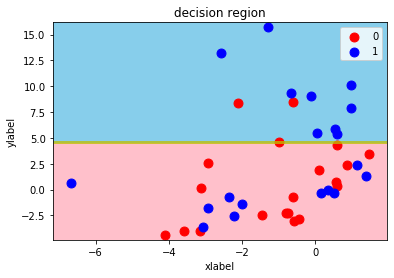

In [82]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
step=0.01
title='decision region'
xlabel='xlabel'
ylabel='ylabel'
target_names=['0', '1']
chida=SDT.tree_sample_predict(b,mesh,2,left_class=0,raight_class=1)
chida=np.array(chida)
"""
2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
背景の色が学習したモデルによる推定値から描画される。
散布図の点は訓練データまたは検証データである。
Parameters
----------------
X : ndarray, shape(n_samples, 2)
    特徴量
y : ndarray, shape(n_samples,)
    ラベル
model : object
    学習したモデルのインスンタスを入れる
step : float, (default : 0.1)
    推定値を計算する間隔を設定する
title : str
    グラフのタイトルの文章を与える
xlabel, ylabel : str
    軸ラベルの文章を与える
target_names= : list of str
    凡例の一覧を与える
"""
# setting
scatter_color = ['red', 'blue']
contourf_color = ['pink', 'skyblue']
n_class = 2
# pred
mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
y_pred = chida.reshape(mesh_f0.shape)
# plot
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
for i, target in enumerate(set(y)):
    plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
plt.legend(handles=patches)
plt.legend()
plt.show()

データセット自体がなかなか分割の難しいようなものであったものあり、難しい分析となった